In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import matplotlib.cm as cm
from operator import itemgetter
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
data = pd.read_csv("data/train_data_preprocessed.csv")

In [3]:
data = data.drop('Unnamed: 0', 1)

C:\Users\iradi\AppData\Local\Temp\ipykernel_9520\2038751425.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Unnamed: 0', 1)


C:\Users\iradi\AppData\Local\Temp\ipykernel_9520\3378513126.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  to_correlate = data.copy().drop(["srch_id","site_id","visitor_location_country_id", "prop_country_id", "prop_id"],1)


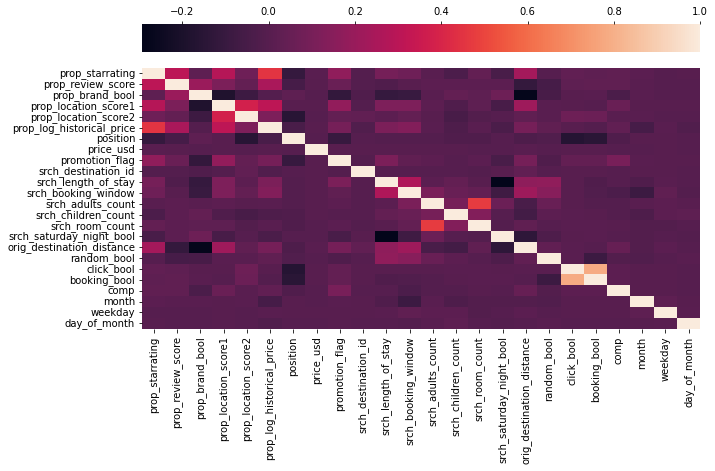

In [4]:
####### correlation plot ########

# looking for colinearity in order to remove variables and examine influence on dependent variables

plt.figure(figsize=(10, 6))
to_correlate = data.copy().drop(["srch_id","site_id","visitor_location_country_id", "prop_country_id", "prop_id"],1)

heatmap = sns.heatmap(to_correlate.corr(), cbar_kws = dict(use_gridspec=False,location="top"))

In [137]:
data.corr()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,comp,month,weekday,day_of_month
srch_id,1.000000,0.003331,-0.006097,-0.005468,-0.000166,-0.001577,-0.003004,-0.003828,0.000439,0.002333,...,0.005654,0.000531,0.004029,-0.000697,0.000194,0.000487,0.000587,-0.001933,-0.000880,0.000567
site_id,0.003331,1.000000,-0.305921,-0.312593,0.002943,0.174845,-0.072956,-0.196217,0.178399,0.058746,...,0.024071,-0.082649,0.426339,0.026814,0.008497,-0.001354,0.026475,-0.001885,0.012745,-0.002120
visitor_location_country_id,-0.006097,-0.305921,1.000000,0.482787,0.000432,-0.112911,0.064881,0.182405,-0.121392,-0.014692,...,-0.027091,0.068939,-0.240717,-0.037232,-0.004806,0.002524,-0.021881,0.002319,-0.000977,0.002860
prop_country_id,-0.005468,-0.312593,0.482787,1.000000,0.000162,-0.161729,0.094020,0.310493,-0.183344,-0.034460,...,-0.011804,0.076750,-0.474110,-0.030175,-0.006222,0.001227,-0.035811,0.007361,-0.005910,-0.001443
prop_id,-0.000166,0.002943,0.000432,0.000162,1.000000,0.002553,0.000134,0.000922,-0.003706,-0.000828,...,-0.000144,0.000125,0.006377,0.002507,0.000246,-0.000508,-0.000029,0.000588,-0.000501,-0.000018
prop_starrating,-0.001577,0.174845,-0.112911,-0.161729,0.002553,1.000000,0.305725,0.021329,0.287322,0.072695,...,0.037151,-0.042530,0.233350,-0.004763,0.030788,0.021206,0.030046,0.011663,-0.001542,0.000422
prop_review_score,-0.003004,-0.072956,0.064881,0.094020,0.000134,0.305725,1.000000,0.206372,0.111119,0.035287,...,0.015637,0.019534,-0.114472,-0.051435,0.023444,0.025936,0.028052,0.008716,-0.000510,-0.001029
prop_brand_bool,-0.003828,-0.196217,0.182405,0.310493,0.000922,0.021329,0.206372,1.000000,-0.184617,-0.082093,...,0.021232,0.070321,-0.281300,-0.048390,0.000866,0.009991,-0.036192,0.006543,-0.004606,-0.001077
prop_location_score1,0.000439,0.178399,-0.121392,-0.183344,-0.003706,0.287322,0.111119,-0.184617,1.000000,0.383582,...,0.022457,-0.050374,0.215418,0.005867,0.002184,-0.003273,0.055532,0.004720,0.003519,0.001904
prop_location_score2,0.002333,0.058746,-0.014692,-0.034460,-0.000828,0.072695,0.035287,-0.082093,0.383582,1.000000,...,-0.014708,-0.005019,0.030006,0.006177,0.068727,0.062235,0.007900,0.005045,-0.001175,-0.002292


In [33]:
##### VIF ######

# further examining colinearity
def vif(dataset, variables):    
    vif, tolerance = {}, {}
    for variable in variables:
        x = [f for f in variables if f != variable]        
        x, y = dataset[x], dataset[variable]
        r2 = LinearRegression().fit(x, y).score(x, y)                
        tolerance[variable] = 1 - r2
        vif[variable] = 1/(tolerance[variable])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [34]:
columns = list(to_correlate.columns)
columns.remove('click_bool')
columns.remove("booking_bool")
vif(to_correlate.dropna(), columns)

,VIF,Tolerance
prop_starrating,1.485598,0.673130
prop_review_score,1.213188,0.824275
prop_brand_bool,1.179060,0.848133
prop_location_score1,1.439564,0.694655
prop_location_score2,1.225598,0.815928
prop_log_historical_price,1.365966,0.732083
position,1.059815,0.943561
price_usd,1.000128,0.999872
promotion_flag,1.092283,0.915513
srch_destination_id,1.004040,0.995977


In [23]:
###### log10 price variable #####
# data["log10_price"] = np.log10(data["price_usd"], out=np.zeros_like(data["price_usd"]), where=(data["price_usd"]!=0))
# data["log10_price"] = pd.cut(data["log10_price"], bins = 9)


In [22]:
# x = pd.DataFrame(data.groupby("log10_price")["click_bool"].value_counts(normalize=True))
# values = [i for enum,i in enumerate(list(x["click_bool"].values)) if enum%2==1]



In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   site_id                      int64  
 2   visitor_location_country_id  int64  
 3   prop_country_id              int64  
 4   prop_id                      int64  
 5   prop_starrating              int64  
 6   prop_review_score            float64
 7   prop_brand_bool              int64  
 8   prop_location_score1         float64
 9   prop_location_score2         float64
 10  prop_log_historical_price    float64
 11  position                     int64  
 12  price_usd                    float64
 13  promotion_flag               int64  
 14  srch_destination_id          int64  
 15  srch_length_of_stay          int64  
 16  srch_booking_window          int64  
 17  srch_adults_count            int64  
 18  srch_children_count          int64  
 19  

c:\Users\iradi\.virtualenvs\venv\lib\site-packages\matplotlib\lines.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val


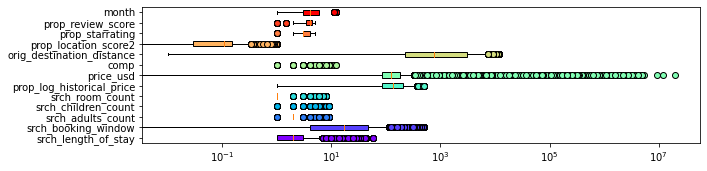

In [25]:
### outlier boxplot ###

# cols that are commented, do not contain outliers
cols = ['srch_length_of_stay', 
        'srch_booking_window',
        'srch_adults_count',
        'srch_children_count',
        'srch_room_count',
        'prop_log_historical_price', 
        'price_usd',
        # 'position',
        'comp',
        'orig_destination_distance',
        # 'prop_location_score1',
        'prop_location_score2',
        'prop_starrating',
        'prop_review_score',
        'month',
        # 'weekday',
        # 'day_of_month'  
        ]
nums = list(range(1,len(cols)+1,1))
fig, ax = plt.subplots(figsize=(1200/120, 300/120))

# my_cmap = plt.get_cmap("hsv")
# rescale = lambda y: (cols.index(y))
vals = [x.dropna() for y,x in data[cols].iteritems()] 

bplot = ax.boxplot(vals, vert=False, flierprops=dict(marker='o', markersize=6, linestyle='none' ), boxprops = dict(linewidth=1), patch_artist=True) 
cmap = cm.ScalarMappable(cmap='rainbow')

for patch, color in zip(bplot['boxes'], cmap.to_rgba(nums)):
        patch.set_facecolor(color)
for patch, color in zip(bplot['fliers'], cmap.to_rgba(nums)):
        patch.set_markerfacecolor(color)

plt.yticks(nums,cols)
plt.xscale('log')


In [94]:

##### determining cutoff values per column ####

data.sort_values(['price_usd'], ascending=[False]).head(50)                           # cutoff above 5500000.00
data.sort_values(['srch_length_of_stay'], ascending=[False]).head(50)                 # no removal cause click even with high values 
data.sort_values(['srch_booking_window'], ascending=[False]).head(50)                 # no removal cause click even with high values 
data.sort_values(['orig_destination_distance'], ascending=[False]).head(50)    # cutoff above 11660
data.sort_values(['prop_location_score2'], ascending=[True]).head(50)    # no removal


,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,comp,month,weekday,day_of_month
4283391,287592,15,55,55,13522,3,4.5,0,1.10,0.0,...,1,0,1,0,4166.847652,0,0.0,6,2,12
2747105,184960,23,181,55,61898,3,4.5,1,0.00,0.0,...,2,0,1,0,4166.847652,1,0.0,6,0,10
4678278,314126,5,219,219,52067,2,4.0,1,0.00,0.0,...,2,0,1,1,76.630000,1,-1.0,4,3,25
309080,20678,5,219,219,127283,3,4.5,1,1.79,0.0,...,2,0,1,1,1021.150000,1,0.0,2,0,25
3386700,227516,5,219,23,53654,3,0.0,0,0.00,0.0,...,1,0,1,0,4338.068703,1,-1.0,1,3,24
3293672,221492,18,129,129,44411,4,4.0,0,1.10,0.0,...,2,0,1,0,11.220000,1,0.0,11,6,4
1987374,133684,16,99,129,92391,3,4.0,0,0.00,0.0,...,1,0,1,0,1941.185897,1,0.0,4,0,29
4948332,332086,5,219,31,133328,4,4.0,0,0.69,0.0,...,1,0,1,0,5038.430000,1,-2.0,1,5,26
4257179,285846,12,99,219,68034,4,5.0,1,0.00,0.0,...,2,0,1,0,782.967063,1,0.0,3,6,17
3293682,221492,18,129,129,85301,4,4.5,1,0.69,0.0,...,2,0,1,0,18.740000,1,-2.0,11,6,4


In [26]:
# percentage of outliers
outliers_perc = []
outliers = pd.DataFrame(index=data.index)
for col in cols:
    # finding the quartiles
    vals = data.loc[:,col].dropna()
    q1 = np.quantile(vals, 0.25)
    q3 = np.quantile(vals, 0.75)

    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    # print(col+": ", lower_bound, upper_bound)
    outliers_perc.append([col,(vals[(vals>upper_bound) | (vals<lower_bound)].count()*100/len(data))])
    outliers[col] = vals[(vals>upper_bound) | (vals<lower_bound)] 

# outliers.head()
outliers["out_count"] = outliers[outliers > 0].count(axis=1)


out_count
1    1792799
2    1215817
0    1142799
3     554646
4     190812
5      49400
6      10731
7       1901
8        247
9         31
dtype: int64
[1142799 1792799 1215817  554646  190812   49400   10731    1901     247
      31]


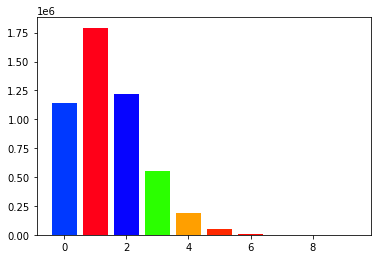

In [96]:
#how many outliers per row
print(outliers.value_counts("out_count"))

outlier_counts = outliers.value_counts("out_count").sort_index()
my_cmap = plt.get_cmap("hsv")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y)) 

plt.bar(list(outlier_counts.keys()),list(outlier_counts.values), color=my_cmap(rescale(list(outlier_counts.values))))
# Create bars

print(outlier_counts.values)


In [ ]:
data.describe().round()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,comp,month,weekday,day_of_month
count,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,...,4958347.0,4958347.0,4958197.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0,4958347.0
mean,2479173.0,166367.0,10.0,175.0,174.0,70079.0,3.0,4.0,1.0,3.0,...,1.0,1.0,1817.0,0.0,0.0,0.0,0.0,5.0,3.0,16.0
std,1431352.0,96112.0,8.0,66.0,68.0,40610.0,1.0,1.0,0.0,2.0,...,0.0,0.0,2174.0,0.0,0.0,0.0,1.0,3.0,2.0,9.0
min,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-12.0,1.0,0.0,1.0
25%,1239586.0,82936.0,5.0,100.0,100.0,35010.0,3.0,4.0,0.0,2.0,...,1.0,0.0,227.0,0.0,0.0,0.0,0.0,3.0,1.0,8.0
50%,2479173.0,166507.0,5.0,219.0,219.0,69638.0,3.0,4.0,1.0,3.0,...,1.0,1.0,776.0,0.0,0.0,0.0,0.0,4.0,3.0,16.0
75%,3718760.0,249724.0,14.0,219.0,219.0,105168.0,4.0,4.0,1.0,4.0,...,1.0,1.0,3059.0,1.0,0.0,0.0,0.0,6.0,4.0,23.0
max,4958346.0,332785.0,34.0,231.0,230.0,140821.0,5.0,5.0,1.0,7.0,...,8.0,1.0,11667.0,1.0,1.0,1.0,12.0,12.0,6.0,31.0


In [27]:
data.loc[outliers['out_count'] == 10] # those have not clicked on a hotel once or booked. all same srch_id
# data.loc[outliers['out_count'] == 9]
# data.loc[outliers['out_count'] == 8]


#### check whether contains booking or click vals
# eights = data.loc[outliers['out_count'] == 10]
# eights[eights['booking_bool']==1]
# eights[eights['click_bool']==1]




,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,comp,month,weekday,day_of_month
2192476,147242,32,220,219,4875,4,4.0,1,5.78,0.5539,...,2,0,9947.35,0,0,0,0.0,12,2,5
2192477,147242,32,220,219,7527,4,4.5,1,5.87,0.6727,...,2,0,9947.22,0,0,0,0.0,12,2,5
2192478,147242,32,220,219,7880,4,4.5,1,5.88,0.6749,...,2,0,9947.19,0,0,0,0.0,12,2,5
2192479,147242,32,220,219,10996,4,4.5,1,5.71,0.3614,...,2,0,9946.77,0,0,0,0.0,12,2,5
2192482,147242,32,220,219,35264,4,4.5,1,5.85,0.3488,...,2,0,9947.56,0,0,0,0.0,12,2,5
2192485,147242,32,220,219,41712,4,4.5,1,5.79,0.3754,...,2,0,9947.55,0,0,0,0.0,12,2,5
2192489,147242,32,220,219,64762,4,4.5,1,5.85,0.6770,...,2,0,9947.20,0,0,0,0.0,12,2,5
2192490,147242,32,220,219,69261,5,5.0,1,5.97,0.4454,...,2,0,9947.32,0,0,0,0.0,12,2,5
2192492,147242,32,220,219,71376,4,4.5,0,5.96,0.5005,...,2,0,9947.32,0,0,0,0.0,12,2,5
2192493,147242,32,220,219,74754,4,4.5,0,5.97,0.4589,...,2,0,9947.31,0,0,0,0.0,12,2,5


In [97]:
# removing rows
data_reduced = data.loc[outliers['out_count']<9].copy()                                 # 4958299
data_reduced = data_reduced[(data_reduced.price_usd < 5500000) | (data_reduced.price_usd.isnull())]                         # 4958296
data_reduced = data_reduced[(data_reduced.orig_destination_distance<11660) | (data_reduced.orig_destination_distance.isnull()) ]    	# 4958293 

In [98]:
data_reduced.info()
# original has 4958347 entries, the new one has 4958293

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959080 entries, 0 to 4959182
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   site_id                      int64  
 2   visitor_location_country_id  int64  
 3   prop_country_id              int64  
 4   prop_id                      int64  
 5   prop_starrating              int64  
 6   prop_review_score            float64
 7   prop_brand_bool              int64  
 8   prop_location_score1         float64
 9   prop_location_score2         float64
 10  prop_log_historical_price    float64
 11  price_usd                    float64
 12  promotion_flag               int64  
 13  srch_destination_id          int64  
 14  srch_length_of_stay          int64  
 15  srch_booking_window          int64  
 16  srch_adults_count            int64  
 17  srch_children_count          int64  
 18  srch_room_count              int64  
 19  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

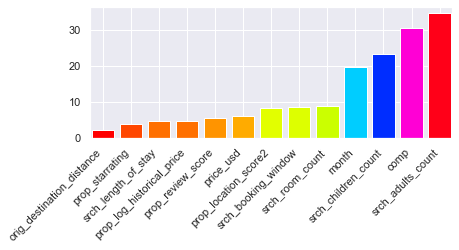

In [ ]:
fig, ax = plt.subplots(figsize=(700/120, 300/120))
# percentage of outliers per column
# outliers_perc = [i for i in outliers_perc if i[1]>0]
outliers_perc = sorted(outliers_perc, key=itemgetter(1))
names = [i[0] for i in outliers_perc]
values = [i[1] for i in outliers_perc]

my_cmap = plt.get_cmap("hsv")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y)) 
plt.tight_layout()
plt.margins(x = 0.003)
plt.bar(names,values, color=my_cmap(rescale(values)))
# Create bars
plt.xticks(rotation=45, ha='right')

In [99]:
data_reduced.to_csv("train_processed_outliers_removed.csv")